**Preparing workspace packages**

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Question 1**

Read in the data using tab separator and name the columns.

In [2]:
gold = pd.read_csv('gold.txt', sep = '	', header = None)
gold.columns = ["url", "category"]
labels = pd.read_csv('labels.txt', sep = '	', header = None)
labels.columns = ["turk","url", "category"]

**Question 2**

Split into two DataFrames. Did a left join on the labels dataset to include all urls in labels and only the ones in the gold dataset. The labels not found in the gold dataset become the labels_unknown DataFrame. 

In [3]:
merged = DataFrame(labels.merge(gold, left_on='url', right_on='url', how='left', suffixes=['_labels', '_gold']))
mask = merged.category_gold.isnull()
labels_on_gold = merged[~mask]
labels_unknown = merged[mask]

**Question 3**

Compute accuracies of turks. We created a column labeled "correct" if the gold category was identical to the labels category. Then, we used groupby to compute number of ratings and the average correctness on the gold DataFrame.

In [4]:
labels_on_gold['correct'] = (labels_on_gold['category_labels']==labels_on_gold['category_gold']).astype(int)
rater_goodness = labels_on_gold.groupby('turk')[['category_labels','correct']].agg({'category_labels':'count',
                                                                                    'correct':'mean'})
print(rater_goodness)

                category_labels   correct
turk                                     
A112DVP1KG4QZU                1  1.000000
A1253FXHCZ9CWM               29  0.517241
A12CY1Q7XKJJDE                1  1.000000
A12RE8G66WTO8B               20  0.750000
A12Y1GTGIQDGRA                3  0.333333
...                         ...       ...
AYWOBMTEGFVVI                 1  0.000000
AZ1S5BIG5R6P6                35  0.714286
AZSDW7JJL5VA7               100  0.680000
AZVB3RZW0OR1H                 3  0.666667
amurray                      15  0.933333

[269 rows x 2 columns]


C:\Users\jocel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Question 4**

Odds ratios. Created a new column using the correct column from Q3 to compute the odds formula.

In [5]:
rater_goodness['odds'] = rater_goodness['correct']/(1.001 - rater_goodness['correct'])
print(rater_goodness)

                category_labels   correct         odds
turk                                                  
A112DVP1KG4QZU                1  1.000000  1000.000000
A1253FXHCZ9CWM               29  0.517241     1.069214
A12CY1Q7XKJJDE                1  1.000000  1000.000000
A12RE8G66WTO8B               20  0.750000     2.988048
A12Y1GTGIQDGRA                3  0.333333     0.499251
...                         ...       ...          ...
AYWOBMTEGFVVI                 1  0.000000     0.000000
AZ1S5BIG5R6P6                35  0.714286     2.491281
AZSDW7JJL5VA7               100  0.680000     2.118380
AZVB3RZW0OR1H                 3  0.666667     1.994018
amurray                      15  0.933333    13.793103

[269 rows x 3 columns]


**Question 5**

Most accurate turks. Created a mask to see which turks rated at least 20 URLs. Then, listed the most accurate turks based on average correctness. 

In [6]:
mask = rater_goodness['category_labels'] >= 20
rater_goodness[mask].sort_values(by='correct', ascending = False)[:10]

,category_labels,correct,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


**Question 6**

Rating counts versus accuracy analysis.

First, we computed some exploratory numerical analysis:

Turks who rate more than average number of URLs actually have higher % correctness (about 68%) than the turks who rate less than the average number of URLs (about 64%). The mean correctness is about 65%. This means that for the turks who rate lots of URLs, they are less likely to be low outliers in correctness.  

Then, we used a linear regression model to compute the relationship:

Referencing the plot's regression line as well as considering the very large p-value, there doesn't appear to be a statistically significant relationship between accuracy and # of URLs. While there are no outliers who rate lots of URLs and have a low correctness score, the coefficient of the linear regression is not high enough to be considered non-zero. The high standard error of category labels in the regression output (0.001) is too high to consider the coefficient (0.0007) non-zero. Thus, based on the linear regression, we do not claim that the number of ratings is strongly related to accuracy. 

Averages of All Raters:

 category_labels     12.356877
correct              0.651262
odds               313.667514
dtype: float64


Turks who rate more than average number of URLs:

 category_labels    42.656250
correct             0.683906
odds                3.165815
dtype: float64


Turks who rate less than average number of URLs:

 category_labels      2.897561
correct              0.641071
odds               410.604630
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                correct   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5488
Date:                Wed, 05 Aug 2020   Prob (F-statistic):              0.459
Time:                        21:39:08   Log-Likelihood:                -94.663
No. Observations:                 269   AIC:                             193.3
Df 

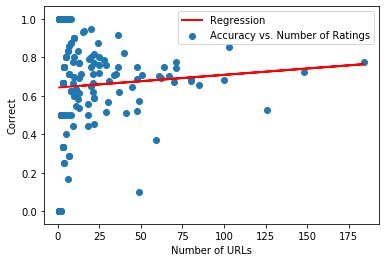

In [7]:
print('Averages of All Raters:\n\n',rater_goodness.mean())

mask = rater_goodness['category_labels']> rater_goodness['category_labels'].mean()
print('\n\nTurks who rate more than average number of URLs:\n\n', rater_goodness[mask].mean())

mask = rater_goodness['category_labels'] < rater_goodness['category_labels'].mean()
print('\n\nTurks who rate less than average number of URLs:\n\n', rater_goodness[mask].mean())

### importing necessary packages ###
import statsmodels.api as sm
from patsy import dmatrices
### creating the design matrix ###
y, X = dmatrices('correct ~ category_labels', data=rater_goodness, return_type='dataframe')
### setting up and fitting the model ###
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
### define x, y_pred, y_true ###
x = rater_goodness['category_labels']
y_actual = rater_goodness['correct']
y_expected = result.params['Intercept'] + result.params['category_labels'] * x
### Plot ###
scatter(x=x, y=y_actual, label='Accuracy vs. Number of Ratings')
plot(x, y_expected, color='red', linewidth=2, label='Regression')
xlabel('Number of URLs')
ylabel('Correct')
legend(loc='best')

**Question 7**

Overall predicted odds. **Note, we DID include URLs that have not been rated by the "reliable" turks. These show as 0.00 in their *overall odds.*** Thus, later in question 8, they do default to being predicted as "G" because all of the overall odds are equivalent. 

In [11]:
#who are the reliable turks
mask = rater_goodness['category_labels'] >= rater_goodness.category_labels.quantile(0.75)
reliable_turks = rater_goodness[mask]

# adding a label called isReliable to note if they're a reliable turk
labels_unknown['isReliable'] = labels_unknown['turk'].isin(reliable_turks.index)

# merging the unknown labels with our odds of each turk
merged = (labels_unknown.merge(rater_goodness, left_on = 'turk', right_on='turk', how = 'left', suffixes = ['','_count']))

# pivoting by the category labels, reliabiltiy, and url 
overall_ratings = (merged.pivot_table(index=['category_labels','isReliable'], 
                     columns='url', 
                     values='odds',
                     fill_value=0, 
                     aggfunc='prod').unstack())

# filtering to view only reliable turks
overall_ratings = (overall_ratings.T.loc[(overall_ratings.columns.get_level_values('isReliable') == True)])
print(overall_ratings)

category_labels                                 G         P    R         X
url                         isReliable                                    
http://0-101.net            True         2.155963  0.000000  0.0  0.000000
http://000.cc               True         1.460583  0.000000  0.0  0.000000
http://0000.jp              True        14.488244  0.000000  0.0  0.000000
http://000relationships.com True         9.914590  1.851852  0.0  0.000000
http://000vitamins.com      True         3.784982  0.000000  0.0  0.000000
...                                           ...       ...  ...       ...
http://zwinky.com           True        16.141443  0.000000  0.0  0.000000
http://zylom.com            True         1.735526  0.000000  0.0  0.000000
http://zynga.com            True         3.704611  0.000000  0.0  0.000000
http://zz868.com            True         1.047852  1.851852  0.0  0.000000
http://zzx.cc               True         1.330229  0.000000  0.0  1.620746

[10707 rows x 4 columns]

**Question 8**

Predicted categories. Computed top category using max index of each overall odds, and including the overall odds. 

In [13]:
result_75 = pd.concat([Series(overall_ratings.index.get_level_values('url')), Series(overall_ratings.idxmax(axis=1).values), Series(overall_ratings.max(axis=1).values)], axis = 1, keys = ['url','top category','top odds'])
result_75 = result_75.set_index('url')
print(result_75)

                            top category   top odds
url                                                
http://0-101.net                       G   2.155963
http://000.cc                          G   1.460583
http://0000.jp                         G  14.488244
http://000relationships.com            G   9.914590
http://000vitamins.com                 G   3.784982
...                                  ...        ...
http://zwinky.com                      G  16.141443
http://zylom.com                       G   1.735526
http://zynga.com                       G   3.704611
http://zz868.com                       P   1.851852
http://zzx.cc                          X   1.620746

[10707 rows x 2 columns]


**Question 9** 

Predicted categories using more turks. First, repeated code from Q7 and Q8 to use the quantile = 0.25. 

Then, printed the DataFrame where we compare the results of result_75 and result_25. 

So, where are the most errors?
G is most often rated the same by both the 75th and 25th percentiles, at 85.3% and then X rated at 78.5%. This makes sense that these are the categories that most turks "agree" on as their more easily identifiable as being definitely G-rated or definitely X-rated. Then, there's more errors in R rated at 56.3%, and the **most errors occur in category P at 45.2% correctness.** This makes sense, as sometimes P ratings from the 75th percentile instead get put into the G category by the 25th percentile raters. 


In [10]:
#who are the reliable turks
mask = rater_goodness['category_labels'] >= rater_goodness.category_labels.quantile(0.25)
reliable_turks = rater_goodness[mask]

# adding a label called is reliable to note if they're a reliable turk
labels_unknown['isReliable'] = labels_unknown['turk'].isin(reliable_turks.index)

# merging the unknown labels with our odds of each turk
merged = (labels_unknown.merge(rater_goodness, left_on = 'turk', right_on='turk', how = 'left', suffixes = ['','_count']))

# pivoting by the category labels, reliabiltiy, and url 
overall_ratings = (merged.pivot_table(index=['category_labels','isReliable'], 
                     columns='url', 
                     values='odds',
                     fill_value=0, 
                     aggfunc='prod').unstack())

# filtering to view only reliable turks
overall_ratings = (overall_ratings.T.loc[(overall_ratings.columns.get_level_values('isReliable') == True)])

# creating predicted categories
result_25 = pd.concat([Series(overall_ratings.index.get_level_values('url')), Series(overall_ratings.idxmax(axis=1).values), Series(overall_ratings.max(axis=1).values)], axis = 1, keys = ['url','top category','top odds'])
result_25 = result_25.set_index('url')

compared = result_75.merge(result_25, left_on = 'url', right_on = 'url', suffixes = ['_75','_25'])

# pivoted comparison
pivoted = compared.pivot_table(index='top category_25',
                               columns='top category_75',
                               values = 'top odds_75',
                               fill_value=0,
                               aggfunc='count',
                               margins=True)

print(pivoted)

top category_75     G    P    R    X    All
top category_25                            
G                7989  229   22   70   8310
P                 847  263   36   12   1158
R                 290   65  120   35    510
X                 240   25   35  429    729
All              9366  582  213  546  10707
